read the loan_default_data.csv file and analyzing class distribution using various sampling techniques

In [20]:
import pandas as pd

df = pd.read_csv("data/train/loan_default_data.csv")
df.shape

(4376, 22)

In [21]:
#quick standardize function to convert columns to numeric and round to specified decimals
def quick_standardize(df, columns, decimals=2):
    df[columns] = df[columns].apply(lambda x: pd.to_numeric(x, errors='coerce')).round(decimals)
    return df

df = quick_standardize(df, ['loanamount', 'totaldue',])


In [22]:
X = df.drop("good_bad_flag", axis=1)
y = df["good_bad_flag"]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
y_train.value_counts(normalize=True)

good_bad_flag
Good    0.782286
Bad     0.217714
Name: proportion, dtype: float64

pilot analysis of class distribution for sampling techniques.

CLASS DISTRIBUTION ANALYSIS:
Class Good: 2738 samples (78.23%)
Class Bad: 762 samples (21.77%)

Imbalance Ratio: 3.59:1
Majority:Minority = 3.59:1


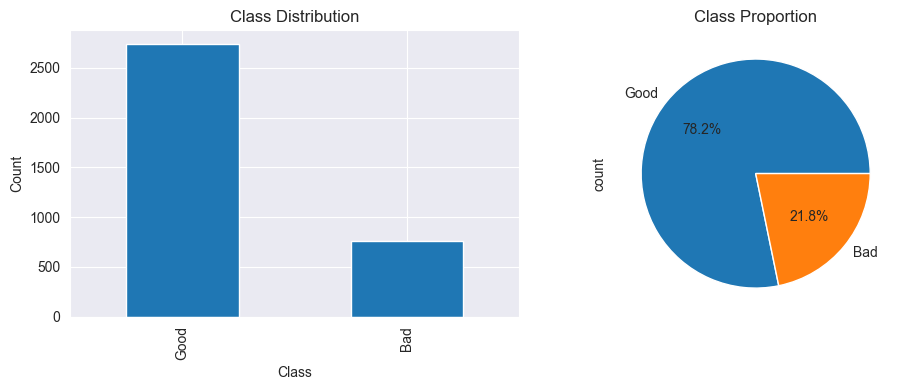

imbalance_ratio: 3.593175853018373
class_counts: Counter({'Good': 2738, 'Bad': 762})


(None, None)

In [23]:
#determining if a column needs to go through over-samping or not
from collections import Counter
from matplotlib import pyplot as plt

def analyze_class_distribution(y):
    """
    Analyze and visualize class distribution
    """
    class_counts = Counter(y)
    total_samples = len(y)

    print("CLASS DISTRIBUTION ANALYSIS:")
    print("=" * 40)

    for class_label, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f"Class {class_label}: {count} samples ({percentage:.2f}%)")

    # Calculate imbalance ratio
    majority_class = max(class_counts.values())
    minority_class = min(class_counts.values())
    imbalance_ratio = majority_class / minority_class

    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
    print(f"Majority:Minority = {imbalance_ratio:.2f}:1")

    # Visualization
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    pd.Series(y).value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    pd.Series(y).value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Class Proportion')

    plt.tight_layout()
    plt.show()

    return imbalance_ratio, class_counts

imbalance_ratio, class_counts = analyze_class_distribution(y_train)
print(f"imbalance_ratio: {imbalance_ratio}"), print(f"class_counts: {class_counts}")

In [27]:
from imblearn.over_sampling import RandomOverSampler

def oversample_my_data(df):

    #Over-sampling customized for your 78%/22% data

    original_good = (df['good_bad_flag'] == 'Good').sum()
    original_bad = (df['good_bad_flag'] == 'Bad').sum()
    original_total = len(df)

    print(f"Original: {original_good} Good + {original_bad} Bad = {original_total} total")
    print(f"Ratio: {original_good/original_bad:.1f}:1 (Good:Bad)")

    X = df.drop('good_bad_flag', axis=1)
    y = df['good_bad_flag']

    over_sampler = RandomOverSampler(random_state=42)
    X_balanced, y_balanced = over_sampler.fit_resample(X, y)

    balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
    balanced_df['good_bad_flag'] = y_balanced

    final_good = (balanced_df['good_bad_flag'] == 'Good').sum()
    final_bad = (balanced_df['good_bad_flag'] == 'Bad').sum()
    final_total = len(balanced_df)

    print(f"Balanced: {final_good} Good + {final_bad} Bad = {final_total} total")
    print(f"Added {final_bad - original_bad} new 'Bad' samples")
    print("✅ Dataset is now perfectly balanced!")

    return balanced_df

balanced_df = oversample_my_data(df)
balanced_df['good_bad_flag'].value_counts()

balanced_df.to_csv("data/train/loan_default_data_oversampled.csv", index=False)

Original: 3423 Good + 953 Bad = 4376 total
Ratio: 3.6:1 (Good:Bad)
Balanced: 3423 Good + 3423 Bad = 6846 total
Added 2470 new 'Bad' samples
✅ Dataset is now perfectly balanced!


In [28]:
# applying SMOTE
from imblearn.over_sampling import SMOTE

def apply_smote_to_my_data(df, target_column='good_bad_flag'):

    print("applying smote to your loan_default_data.csv")
    print("=" * 45)

    X = df.drop(columns=[target_column])
    y = df[target_column]

    original_good = (y == 'Good').sum()
    original_bad = (y == 'Bad').sum()

    print(f"Original data:")
    print(f"  Good: {original_good} samples")
    print(f"  Bad:  {original_bad} samples")
    print(f"  Imbalance ratio: {original_good/original_bad:.1f}:1")

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    final_good = (y_resampled == 'Good').sum()
    final_bad = (y_resampled == 'Bad').sum()

    print(f"\nAfter SMOTE:")
    print(f"  Good: {final_good} samples")
    print(f"  Bad:  {final_bad} samples")
    print(f"  Total: {len(X_resampled)} samples")
    print(f"  Synthetic samples created: {final_bad - original_bad}")

    # Create balanced DataFrame
    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_df[target_column] = y_resampled

    print(f"\n SMOTE successfully created {final_bad - original_bad} synthetic 'Bad' samples!")
    print(f"   Dataset is now perfectly balanced with 50/50 distribution")

    return balanced_df


smote_balanced_data = apply_smote_to_my_data(df)

applying smote to your loan_default_data.csv
Original data:
  Good: 3423 samples
  Bad:  953 samples
  Imbalance ratio: 3.6:1


ValueError: could not convert string to float: '8a2a81a74ce8c05d014cfb32a0da1049'